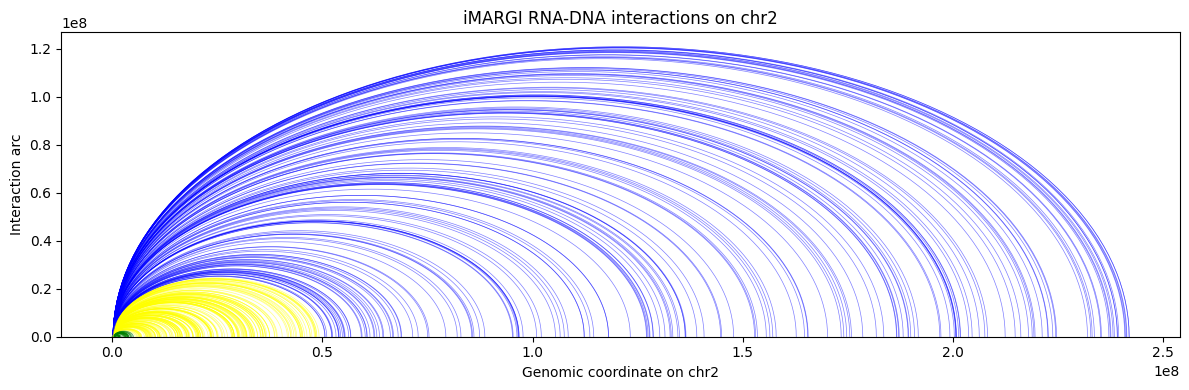

In [2]:
import gzip
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------

pair_file = "/projectnb/perissilab/Xinyu/GPS2_CHIPseq/iMargi/output/final_SRR9900120.pairs.gz"
chromosome = "chr2"  
max_pairs = 1000      

# -------------------------------

pairs = []
with gzip.open(pair_file, 'rt') as f:
    for line in f:
        if line.startswith("#") or line.strip() == "":
            continue
        cols = line.strip().split('\t')
        chrom1, pos1 = cols[1], int(cols[2])
        chrom2, pos2 = cols[3], int(cols[4])

        if chrom1 == chrom2 == chromosome:
            pairs.append((pos1, pos2))
            if len(pairs) >= max_pairs:
                break

# -------------------------------

plt.figure(figsize=(12, 4))
for pos1, pos2 in pairs:
    x_center = (pos1 + pos2) / 2
    width = abs(pos1 - pos2)
    height = width / 2
    theta = np.linspace(0, np.pi, 100)
    x = x_center + (width/2) * np.cos(theta)
    y = (height) * np.sin(theta)

    if width < 5000000:
        color = 'green'
    elif width < 50000000:
        color = 'yellow'
    else:
        color = 'Blue'

    plt.plot(x, y, color=color, alpha=0.5, linewidth=0.5)

plt.title(f"iMARGI RNA-DNA interactions on {chromosome}")
plt.xlabel(f"Genomic coordinate on {chromosome}")
plt.ylabel("Interaction arc")
plt.ylim(0, )
plt.tight_layout()
plt.show()
